### Classes and modules

In [1]:
#Lets have matplotlib "inline"
%matplotlib inline

import os
import sys

#Import packages we need
import numpy as np
from netCDF4 import Dataset
import datetime
from IPython.display import display
import pyproj

#For plotting
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams["lines.color"] = "w"
plt.rcParams["text.color"] = "w"
plt.rcParams["axes.labelcolor"] = "w"
plt.rcParams["xtick.color"] = "w"
plt.rcParams["ytick.color"] = "w"

from importlib import reload

In [2]:
z_source_url = "C:\\Users\\florianb\\Downloads\\NorKyst-800m_ZDEPTHS_his.an.2019071600.nc"
z_nc = Dataset(z_source_url)


avg_z_source_url = "C:\\Users\\florianb\\Downloads\\NorKyst-800m_ZDEPTHS_avg.an.2019071600.nc"
avg_z_nc = Dataset(avg_z_source_url)

In [3]:
X = z_nc["X"].shape[0]
Y = z_nc["Y"].shape[0]

In [4]:
from gpuocean.utils.NetCDFInitialization import depth_integration
upper_hu = np.ma.zeros((24,Y,X))
upper_hv = np.ma.zeros((24,Y,X))
for t_idx in range(24):
    upper_hu[t_idx] = depth_integration(z_nc, 25.0, 0, X, 0, Y, "u", timestep_index=t_idx)
    upper_hv[t_idx] = depth_integration(z_nc, 25.0, 0, X, 0, Y, "v", timestep_index=t_idx)

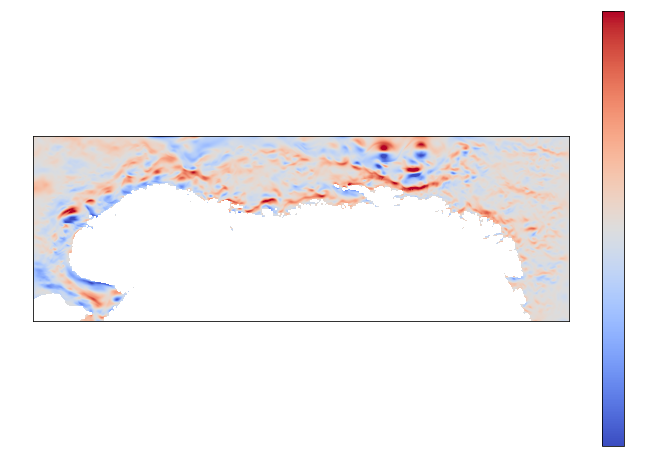

In [5]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
im = ax.imshow(np.ma.average(upper_hu, axis=0), origin="lower", cmap=plt.cm.coolwarm, vmin=-10, vmax=10)
plt.title("Day-average upper layer u-currents")
plt.colorbar(im)

In [6]:
full_hu = np.ma.zeros((24,Y,X))
full_hv = np.ma.zeros((24,Y,X))
for t_idx in range(24):
    full_hu[t_idx] = z_nc["ubar"][t_idx]
    full_hv[t_idx] = z_nc["vbar"][t_idx]
    

In [7]:
upper_u = upper_hu / (25.0 + z_nc["zeta"][:])
upper_v = upper_hv / (25.0 + z_nc["zeta"][:])


In [8]:
full_u = full_hu / (np.ma.array(z_nc["h"][:], mask=full_hu[0].mask) + z_nc["zeta"][:])
full_v = full_hv / (np.ma.array(z_nc["h"][:], mask=full_hv[0].mask) + z_nc["zeta"][:])

In [9]:
baroclinic_hu = 25.0 *(upper_u - full_u)
baroclinic_hv = 25.0 *(upper_v - full_v)

Text(0.5, 0.98, 'Baroclinic Initalisations (for every hour)')

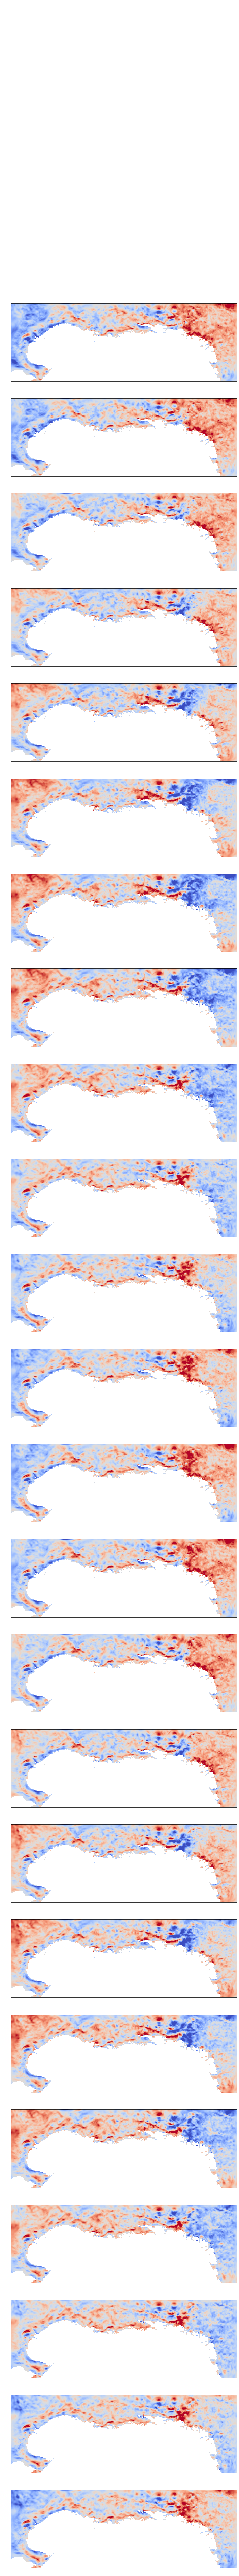

In [10]:
fig, axs = plt.subplots(24,1, figsize=(12,124))

for a in range(24):
    axs[a].imshow(baroclinic_hu[a], origin="lower", cmap="coolwarm", vmin=-10, vmax=10)

fig.suptitle("Baroclinic Initalisations (for every hour)")

The results of day-averages and baroclinic construction are far different